# Project Title :- 



##### $\color{red}{\text{ Machine Learning to Train a Temperature Predictor that can Predict Bottomhole Temperature using \n Production parameters as inputs.}}$

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Import the Dataset

>The Dataset we will use is the Volve-Field Dataset, which is a Time-Series Dataset
>>In Time Series Dataset, always use these two steps during import : **index_col=0, parse_dates=True**

In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',
                 index_col=0, parse_dates=True)

#### Majority of Data Science is Exploring, Processing and Analyzing the Data.
>Once the data is ready to be used, then only at the end Machine-Learning is carried out.

#### Look at the Head and the Tail of the Dataset

In [133]:
df.head(5)

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
df.tail(2)

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-12,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


#### Check the Data-Info, in order to see for Datatypes and Null counts. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

##### Note : The good thing with Dataset is :- We have :-
1. All Non-Nulls (No column has null values). All Non-Null Entries = Row Count. 
2. All Numeric Data (which is a good thing)

#### Descriptive Statistics 
> Watch out for how far Min-Max are from the IQR

In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
onstreaminject_HRS,3291.0,19.528256,8.669803,0.0,21.67000,24.00000,24.000000,25.000
BORE_WI_VOL,3291.0,4935.663628,2625.955533,0.0,3972.50000,5335.00000,6851.500000,9316.000
ON_STREAM_HRS,3291.0,20.017419,8.303784,0.0,24.00000,24.00000,24.000000,25.000
AVG_DOWNHOLE_PRESSURE,3291.0,76.283155,118.248271,0.0,0.00000,0.00000,235.838500,317.701
AVG_DOWNHOLE_TEMPERATURE,3291.0,31.424488,48.547561,0.0,0.00000,0.00000,105.919000,107.508
AVG_DP_TUBING,3291.0,80.758924,73.006429,0.0,32.23550,37.92125,170.045500,314.409
AVG_ANNULUS_PRESS,3291.0,16.368846,7.197959,0.0,12.54300,18.01900,20.587000,30.020
AVG_CHOKE_SIZE_P in percentage,3291.0,64.158081,33.810811,0.0,40.98384,65.98804,99.895675,100.000
AVG_WHP_P,3291.0,45.803679,25.954204,0.0,32.19900,37.46400,59.079500,137.311
AVG_WHT_P,3291.0,74.345872,26.140866,0.0,76.54900,81.69300,90.002500,92.459


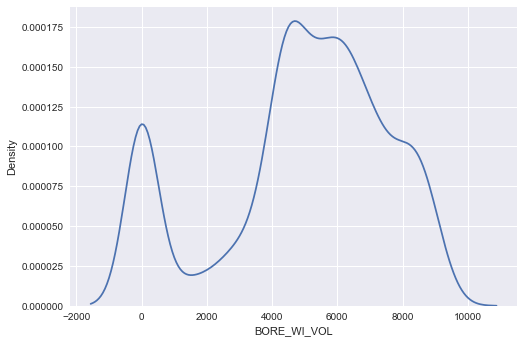

In [142]:
sns.kdeplot(df['BORE_WI_VOL']);

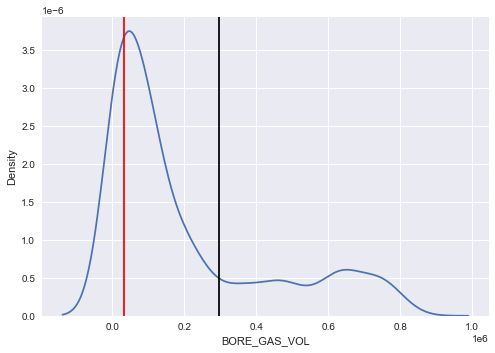

In [141]:
sns.kdeplot(df['BORE_GAS_VOL']);
plt.axvline(33259.00000, color='red')
plt.axvline(295593.000000, color='k')

### Lets analyze the outliers from the above table first and then from the Visualization.

DP_CHOKE_SIZE | 	BORE_OIL_VOL | 	BORE_GAS_VOL |	BORE_WAT_VOL   contains the Outliers

#### Excercise :- Lets Visualize the Boxplots for each of these. (Use Subplots)

In [8]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

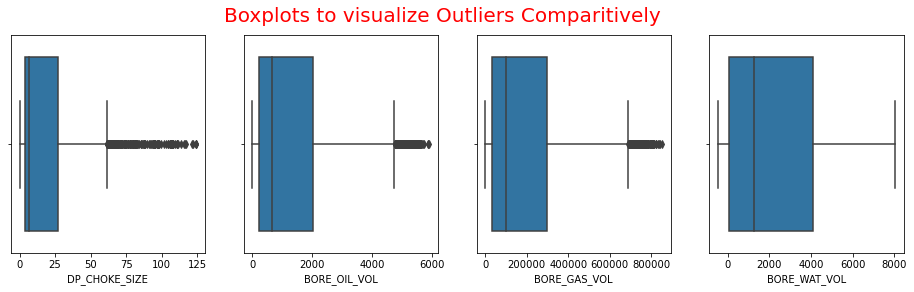

In [21]:
plt.figure(figsize=(16, 4))

plt.subplot(141)
sns.boxplot(df['DP_CHOKE_SIZE']);

plt.subplot(142)
sns.boxplot(df['BORE_OIL_VOL']);

plt.subplot(143)
sns.boxplot(df['BORE_GAS_VOL']);

plt.subplot(144)
sns.boxplot(df['BORE_WAT_VOL']);

plt.suptitle('Boxplots to visualize Outliers Comparitively', size=20, color='red');

### So you can see our guess was almost correct. 

> We can visualize the same thing using a displot and then we can connect various obserevations in a Boxplot to that in a distribution.

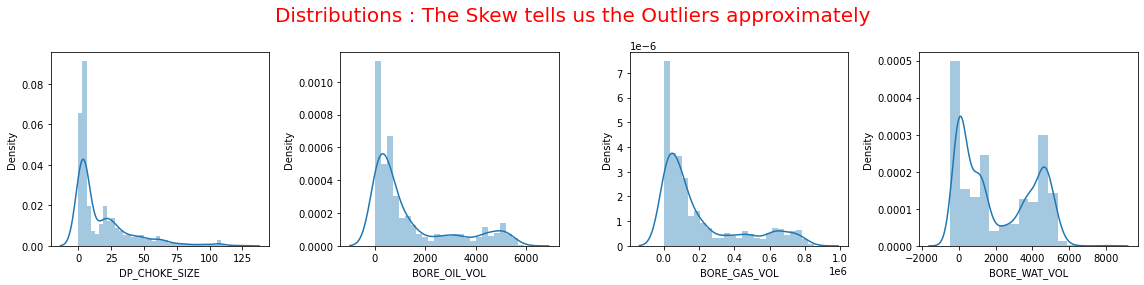

In [25]:
plt.figure(figsize=(16, 4))

plt.subplot(141)
sns.distplot(df['DP_CHOKE_SIZE']);

plt.subplot(142)
sns.distplot(df['BORE_OIL_VOL']);

plt.subplot(143)
sns.distplot(df['BORE_GAS_VOL']);

plt.subplot(144)
sns.distplot(df['BORE_WAT_VOL']);



plt.suptitle('Distributions : The Skew tells us the Outliers approximately', size=20, color='red');

plt.tight_layout()

#### To remove Outliers :- We should either remove all the rows that have outlier data or replace them with values from within the IQR

## Important Excercise :- 
Create a function that takes in a column, calculates and returns number of outlers (or % Outliers)

In [144]:
def outlier_counter(col_name, df):
    """
    The rule is :- Any value beyond 75 + 1.5*IQR or 25 - 1.5*IQR is outlier. 
    """
    A = df[col_name]
    
    q_75 = np.quantile(df[col_name], 0.75)
    q_25 = np.quantile(df[col_name], 0.25)
    
    iqr = q_75 - q_25
    
    max_allowed = q_75 + 1.5*iqr
    min_allowed = q_25 - 1.5*iqr
    
    df_temp = A[(A>max_allowed) | (A<min_allowed)]
    count_of_outliers = len(df_temp)
    
    return count_of_outliers , 100*count_of_outliers/len(A)

In [145]:
outlier_counter('DP_CHOKE_SIZE', df)

#205 is Count and 6.23% is % of outliers in that column

(205, 6.229109693102401)

#### Now Lets count outliers for each column & Store it in a dictionary with column name as key

In [147]:
OC = dict()

for c in df.columns:
    
    n,f = outlier_counter(c,df)
    
    OC[c] = [f]

In [149]:
OC

{'onstreaminject_HRS': [21.209358857490123],
 'BORE_WI_VOL': [0.0],
 'ON_STREAM_HRS': [24.88605287146764],
 'AVG_DOWNHOLE_PRESSURE': [0.0],
 'AVG_DOWNHOLE_TEMPERATURE': [0.0],
 'AVG_DP_TUBING': [0.0],
 'AVG_ANNULUS_PRESS': [6.715284108173807],
 'AVG_CHOKE_SIZE_P in percentage': [0.0],
 'AVG_WHP_P': [3.4943786083257367],
 'AVG_WHT_P': [13.309024612579764],
 'DP_CHOKE_SIZE': [6.229109693102401],
 'BORE_OIL_VOL': [7.99149194773625],
 'BORE_GAS_VOL': [6.441810999696141],
 'BORE_WAT_VOL': [0.0]}

<AxesSubplot:>

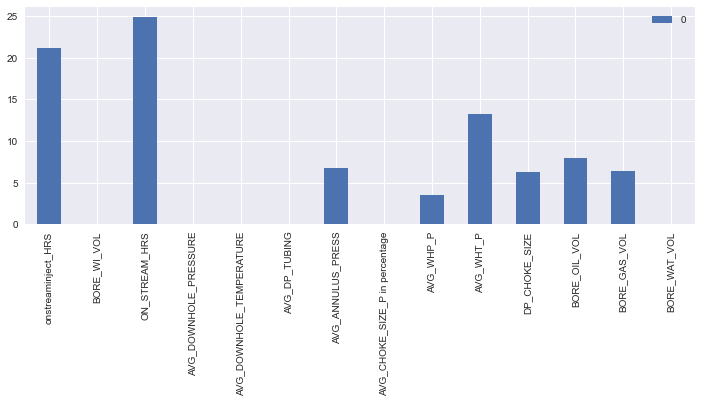

In [148]:
pd.DataFrame(OC).T.plot(kind='bar', figsize=(12, 4))

#### So, Worst columns are :- onstreaminjection_HRS, ON_STREAM_HRS, AVG_WHT_P, Choke size and Bore Oil Vol

#### Excercise :- Visualize the Distribution for each column and see if you can still correlate the above info by looking at the SKEW in the distributions.

## Nulls arent the only hazard to your model. Unnecessary zeros need be checked as well.

### Excercise :- Write a function to count the number of zeros in every column of your data.

In [150]:
def zeros_counter(col_name, df):
    
    A = df[col_name]
    
    n = sum(A == 0)
    
    f = 100*n/len(A)
    
    return n,f

In [151]:
zeros_counter('DP_CHOKE_SIZE', df)

(154, 4.679428745062291)

**Similarly count number of Zeros & store in a DICT and viz**

In [152]:
ZC = dict()

for c in df.columns:
    
    n,f = zeros_counter(c,df)
    
    ZC[c] = [f]

<AxesSubplot:>

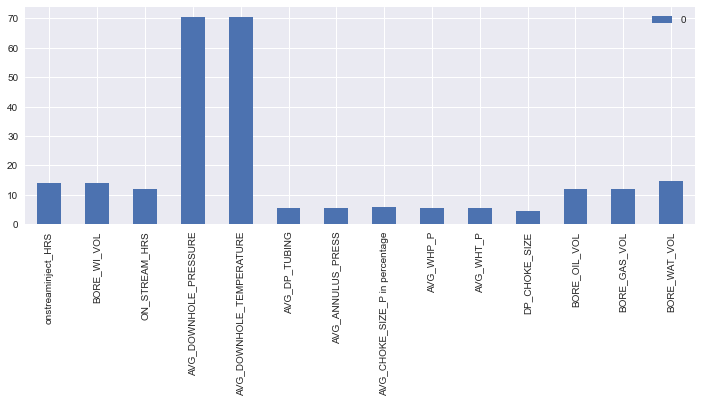

In [153]:
(pd.DataFrame(ZC).T).plot(kind='bar', figsize=(12,4))

#### What if you wanted to show a Threshold of 10% zeros as guided by your manager.

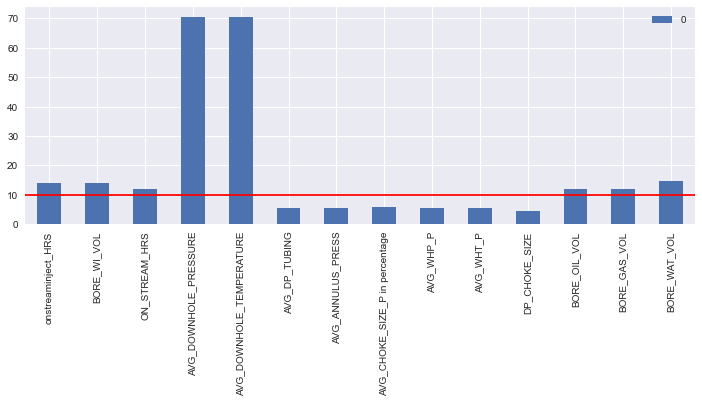

In [154]:
(pd.DataFrame(ZC).T).plot(kind='bar', figsize=(12,4))
plt.axhline(10, color='red')

### Looks like The Downhole Temp and Pressure features have almost 70% zeros. Visualize them. 

>IT almost feels like they don't have any necessary information.

In [62]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [155]:
df_tooManyZeros = df[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE']]

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

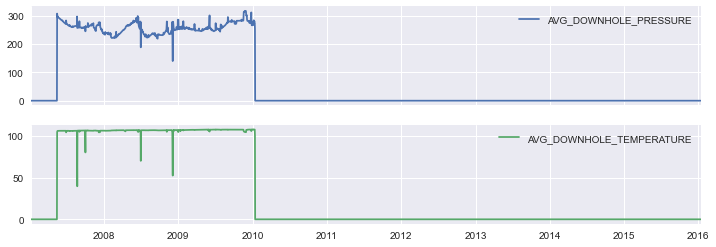

In [156]:
df_tooManyZeros.plot(figsize=(12,4), subplots=True, grid=True)

### This analysis tells us that maybe either the Temperature or the Pressure Sensor Failed around that 2010 mark or maybe both were installed in a common casing which disfunctioned or something wrong.

>Ideally, in a Data-Science Team, we would have field based SME connects who we would ask this question to. 

#### Best Solution :- Get the field personnel to give you the data from an approximate/replacement/nearby sensor data from 2010 onwards. 

#### Temporary Solution :- Interpolation

> We can interpolate with mean for 2010 onwards. 

<AxesSubplot:>

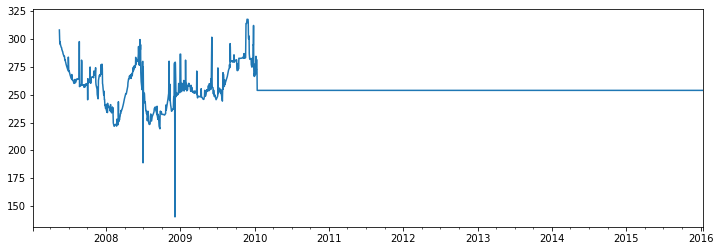

In [75]:
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,np.nan).interpolate().plot(figsize=(12,4))

<AxesSubplot:>

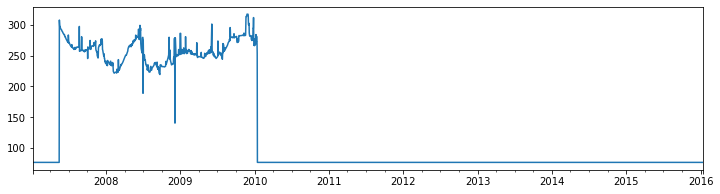

In [80]:
avg_temp = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].mean()
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,avg_temp).plot(figsize=(12,3))

#### The choice is yourss, whicherver best works for your team and as per your client agreements. 

> I'm going with Interpolation

In [170]:
df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE'] = df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE'].replace(0,np.nan).interpolate()
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'] = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,np.nan).interpolate()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

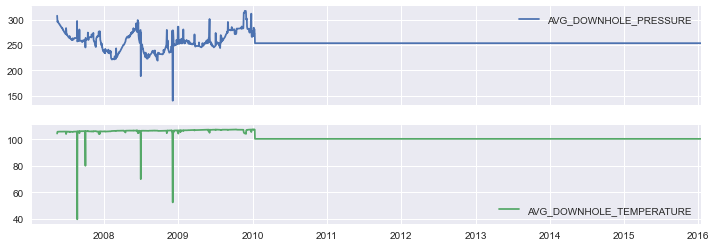

In [171]:
df_tooManyZeros.plot(figsize=(12,4), subplots=True)

### Let's apply this correction to the original Dataset.

In [172]:
df['AVG_DOWNHOLE_PRESSURE'] = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE']
df['AVG_DOWNHOLE_TEMPERATURE'] = df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE']

#### Verify weather the problem is now solved

In [173]:
ZC_f = dict()

for c in df.columns:
    
    n,f = zeros_counter(c,df)
    
    ZC_f[c] = [f]

(0.0, 100.0)

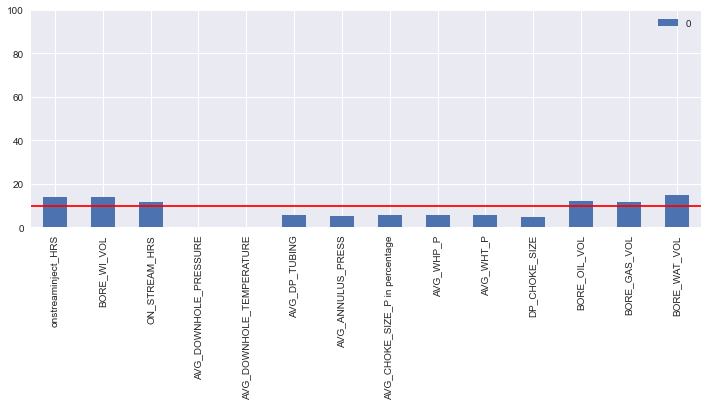

In [174]:
pd.DataFrame(ZC_f).T.plot(kind='bar', figsize=(12,4))

plt.axhline(10, color='red')
plt.ylim(0,100)

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
onstreaminject_HRS,3291.0,19.528256,8.669803,0.000,21.67000,24.00000,24.000000,25.000
BORE_WI_VOL,3291.0,4935.663628,2625.955533,0.000,3972.50000,5335.00000,6851.500000,9316.000
ON_STREAM_HRS,3291.0,20.017419,8.303784,0.000,24.00000,24.00000,24.000000,25.000
AVG_DOWNHOLE_PRESSURE,3163.0,255.132388,11.125736,140.256,253.85200,253.85200,253.852000,317.701
AVG_DOWNHOLE_TEMPERATURE,3163.0,102.203572,3.342199,39.554,100.38900,100.38900,105.975000,107.508
AVG_DP_TUBING,3291.0,80.758924,73.006429,0.000,32.23550,37.92125,170.045500,314.409
AVG_ANNULUS_PRESS,3291.0,16.368846,7.197959,0.000,12.54300,18.01900,20.587000,30.020
AVG_CHOKE_SIZE_P in percentage,3291.0,64.158081,33.810811,0.000,40.98384,65.98804,99.895675,100.000
AVG_WHP_P,3291.0,45.803679,25.954204,0.000,32.19900,37.46400,59.079500,137.311
AVG_WHT_P,3291.0,74.345872,26.140866,0.000,76.54900,81.69300,90.002500,92.459


### Final and One of the Most Important Preprocessing step :- Scaling of Data

##### 1. But first do the train test split since we dont wanna leak any data to test set.

In [94]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [176]:
df = df[['BORE_WAT_VOL','DP_CHOKE_SIZE', 'AVG_WHP_P' , 'AVG_DP_TUBING' , 'BORE_OIL_VOL' , 'BORE_OIL_VOL' ,'AVG_DOWNHOLE_TEMPERATURE']]

In [177]:
output_target = 'AVG_DOWNHOLE_TEMPERATURE'

In [178]:
df_train = df.iloc[:3000,:].fillna(0)
df_test = df.iloc[3000:,:].fillna(0)

In [179]:
X_train = df_train.drop(output_target, axis=1) ; y_train = df_train[output_target]
X_test = df_test.drop(output_target , axis=1) ; y_test = df_test[output_target]

In [180]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
scaler = MinMaxScaler()

In [182]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [183]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [184]:
X_train.values.min(), X_train.values.max()

(-458.0, 8020.0)

## Let's apply Machine Learning

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
model = RandomForestRegressor(n_estimators=200)

In [187]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200)

In [188]:
yp_train = model.predict(X_train_scaled)
yp_test = model.predict(X_test_scaled)

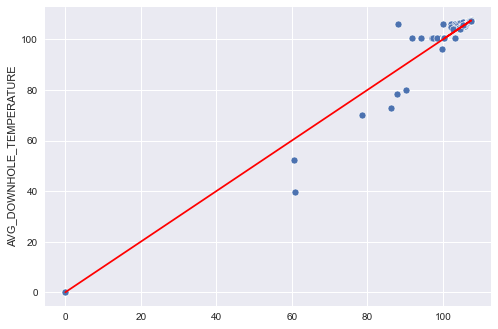

In [191]:
sns.scatterplot(yp_train, y_train)
plt.plot(yp_train, yp_train, color='red')

<AxesSubplot:ylabel='AVG_DOWNHOLE_TEMPERATURE'>

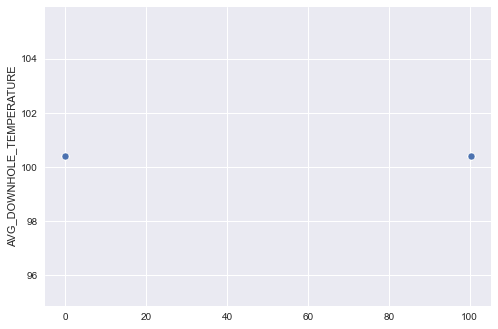

In [192]:
sns.scatterplot(yp_test, y_test)

(13672.0, 16812.0)

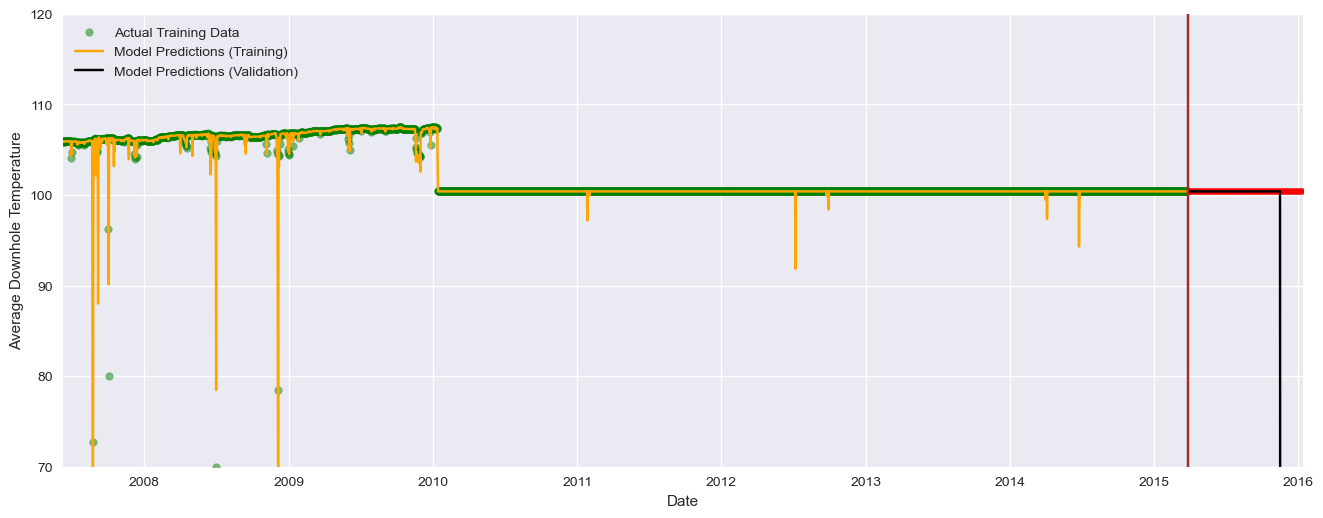

In [193]:
plt.figure(figsize=(16,6), dpi=100)
plt.style.use('seaborn')

plt.scatter(y_train.index , y_train , color='green', alpha=0.5, s=30, label='Actual Training Data')
plt.plot(y_train.index, yp_train , label='Model Predictions (Training)', color='orange')

plt.scatter(y_test.index, y_test , color='red', alpha=0.5, s=15)
plt.plot(y_test.index, yp_test, color='black',label='Model Predictions (Validation)')

plt.axvline(y_test.index[0] , color='brown')


plt.ylabel('Average Downhole Temperature')
plt.xlabel('Date')

plt.legend()
plt.ylim(70,120)
plt.xlim(y_train.index[150] , y_test.index[-1])

In [194]:
from sklearn.metrics import mean_squared_error as mse

In [195]:
mse(y_train, yp_train)

0.5280404323763267

In [196]:
mse(y_test, yp_test)

1974.031702051546